In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [15]:
df = pd.read_csv("yield_df.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


<Axes: xlabel='count', ylabel='Area'>

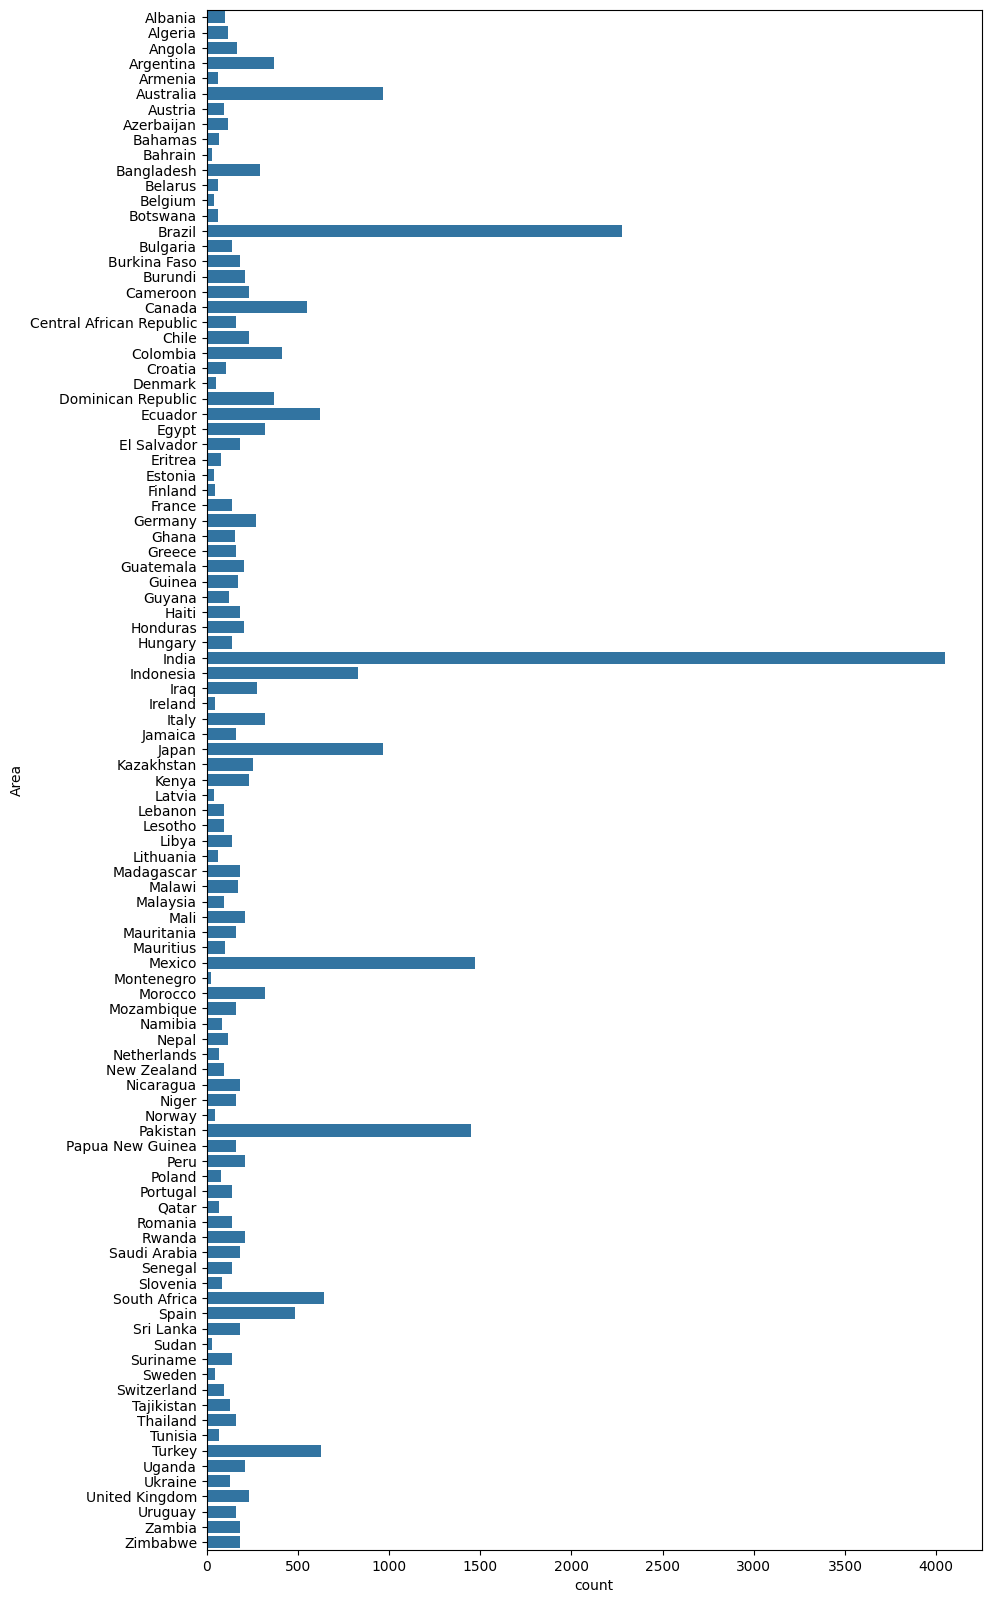

In [17]:
plt.figure(figsize=(10,20))
sns.countplot(y = df['Area'])

Text(0.5, 1.0, 'Yeild per country')

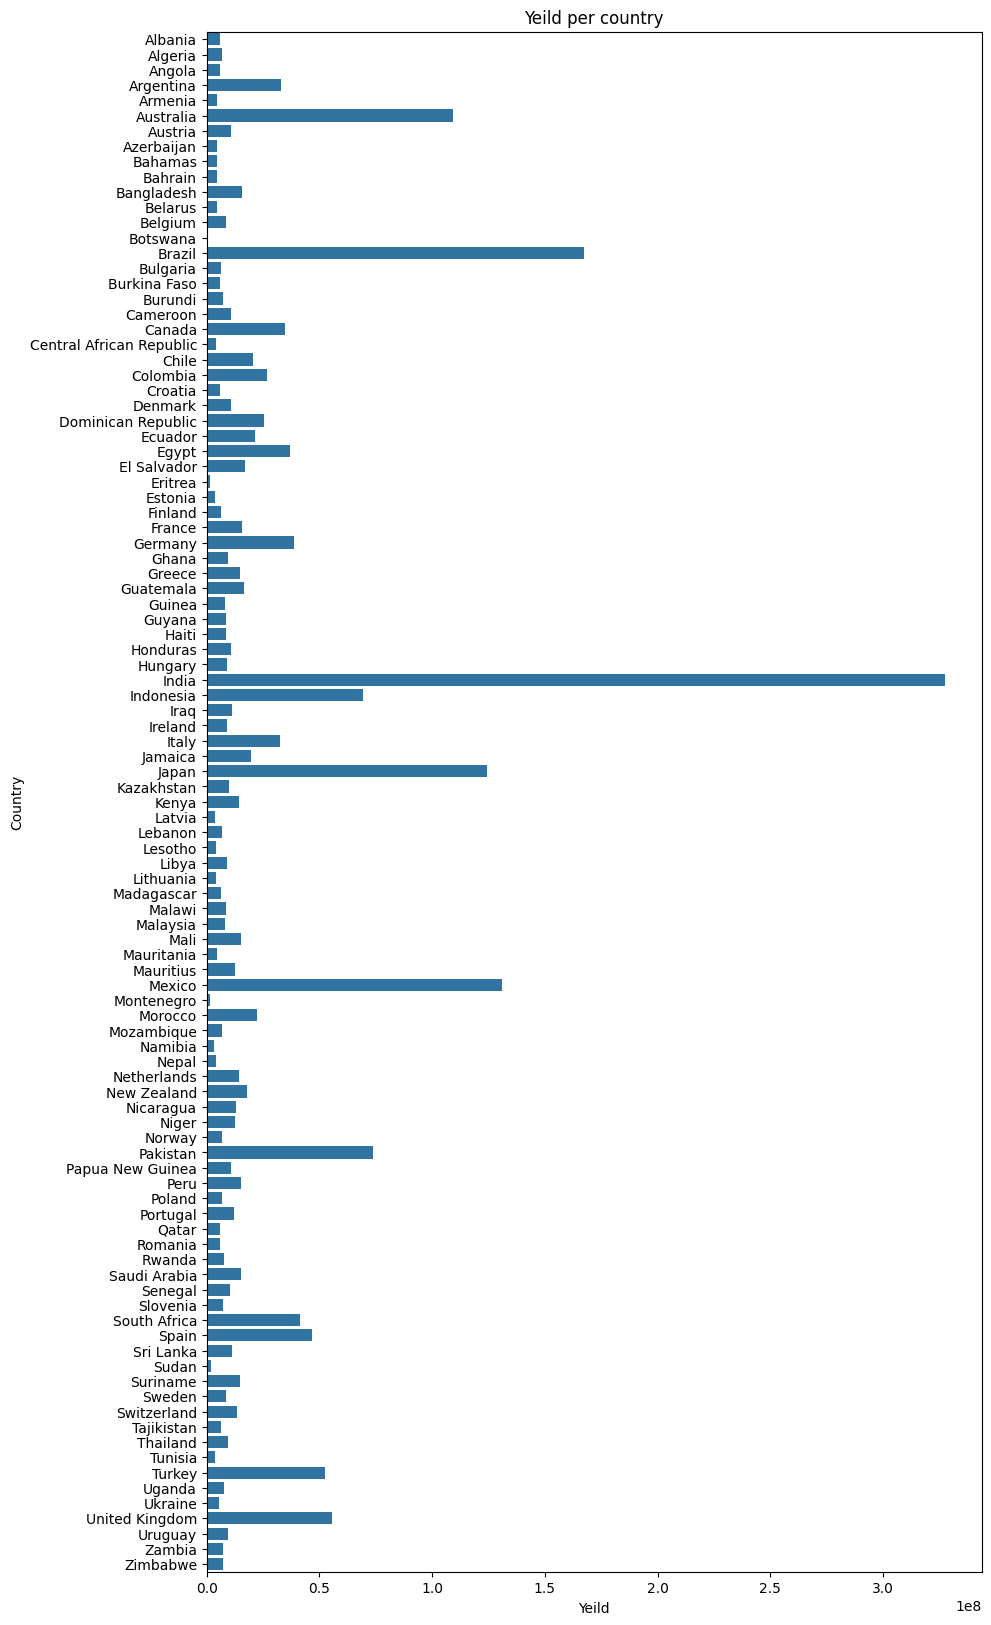

In [18]:
yeild_country = []
countries = df['Area'].unique()
for country in countries :
    yeild_country.append(df[df['Area'] == country]['hg/ha_yield'].sum())

plt.figure(figsize=[10,20])
sns.barplot(x = yeild_country , y = countries)
plt.xlabel('Yeild')
plt.ylabel('Country')
plt.title('Yeild per country')

<Axes: xlabel='count', ylabel='Item'>

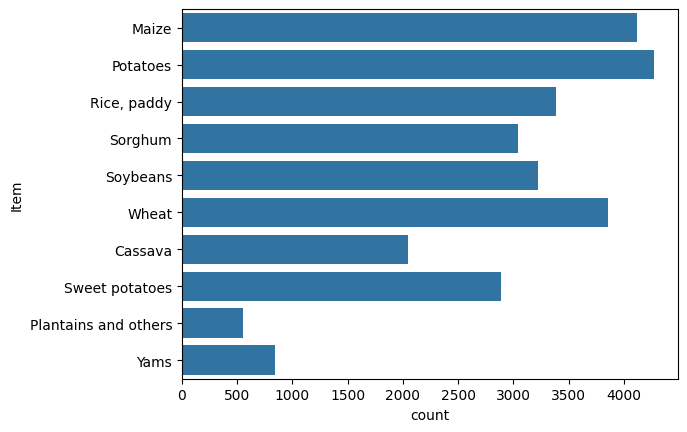

In [19]:
sns.countplot(y = df['Item'])

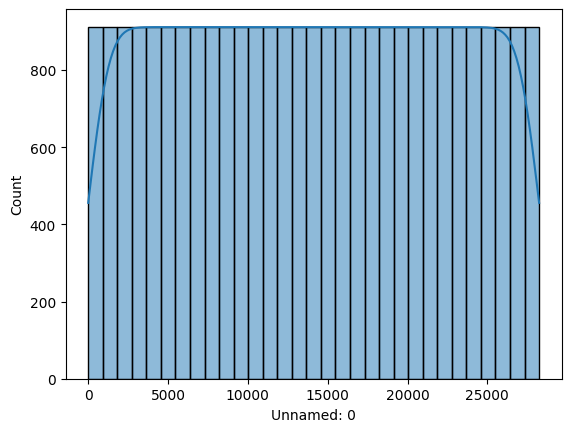

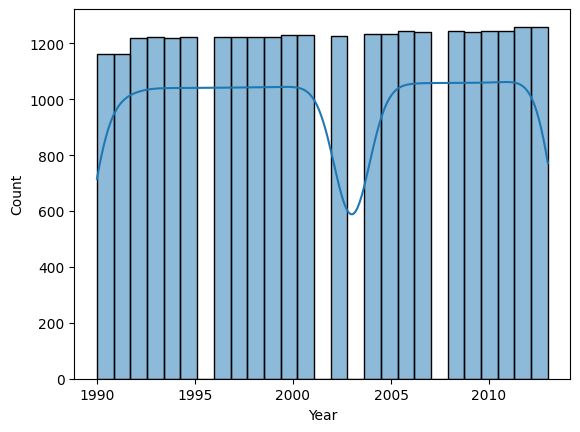

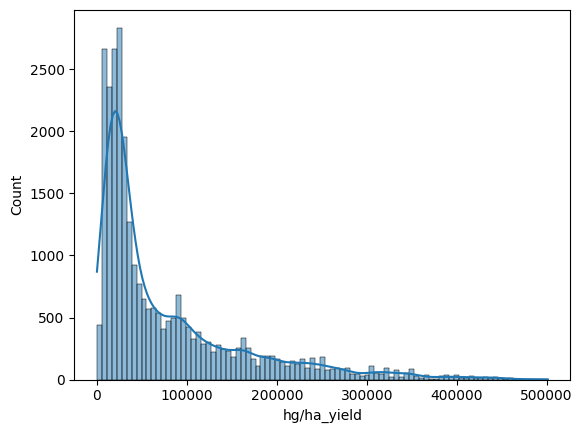

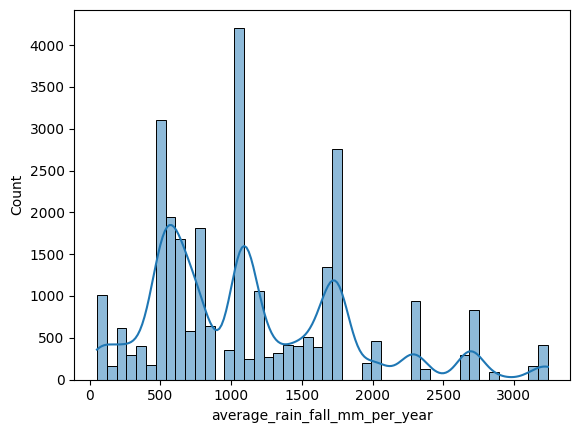

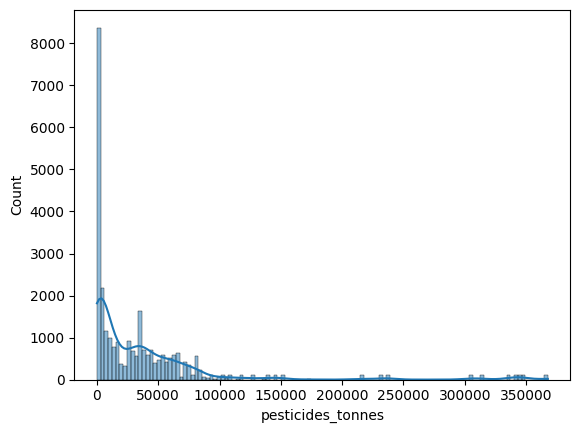

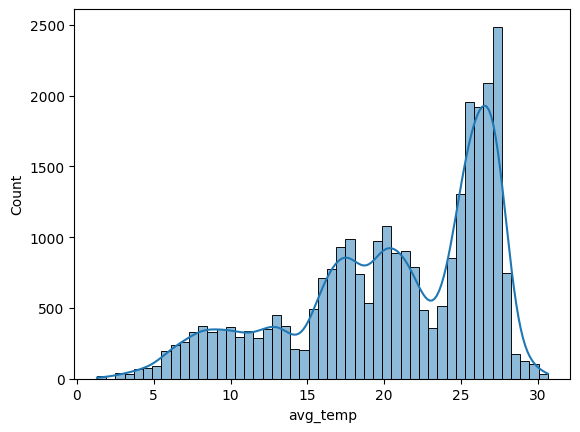

In [8]:
for col in df:
    if df[col].dtype != 'O':
        sns.histplot(df[col],kde=True)
        plt.show()

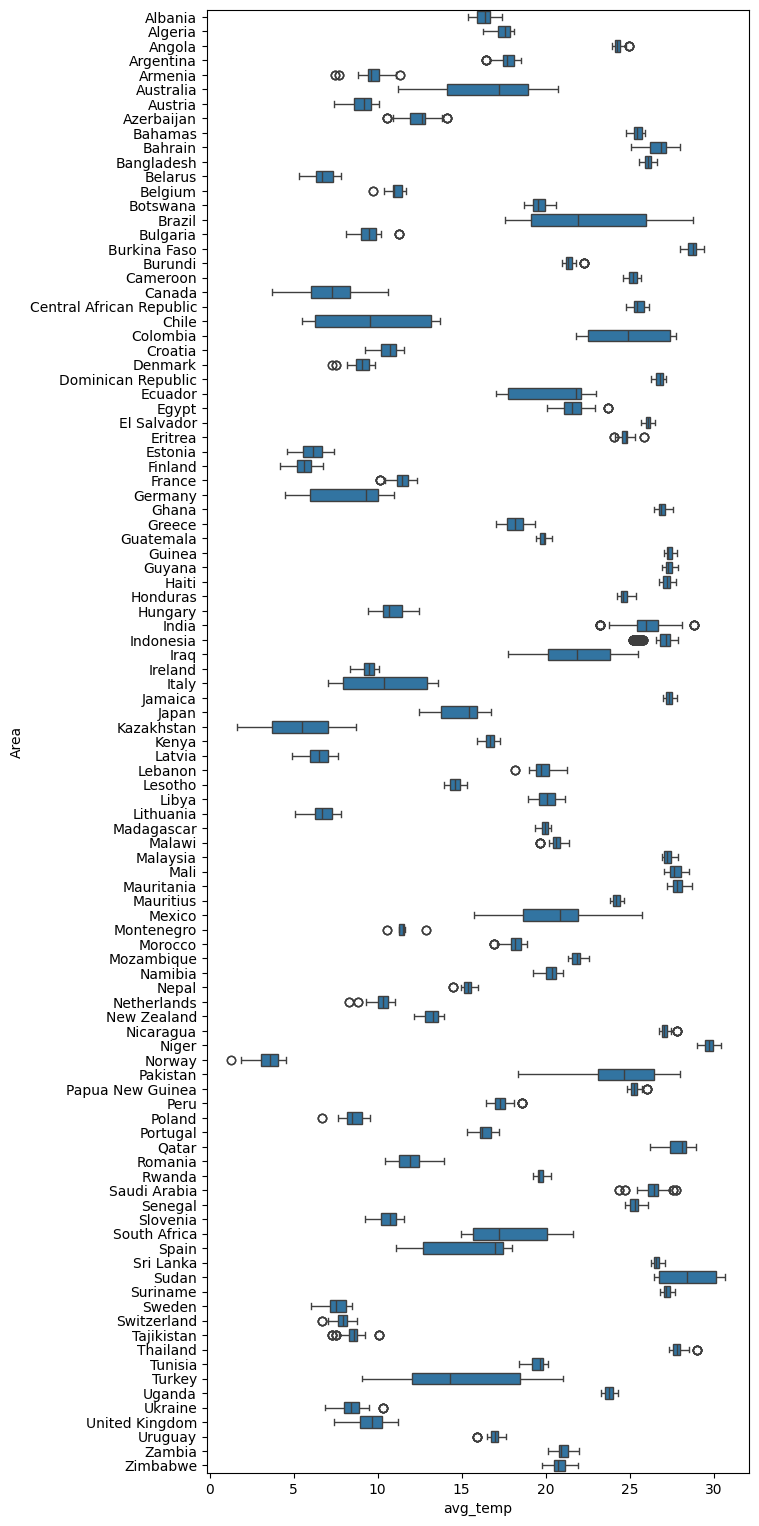

In [20]:
plt.figure(figsize=(7,19))
sns.boxplot(y='Area', x='avg_temp', data=df)
plt.show()

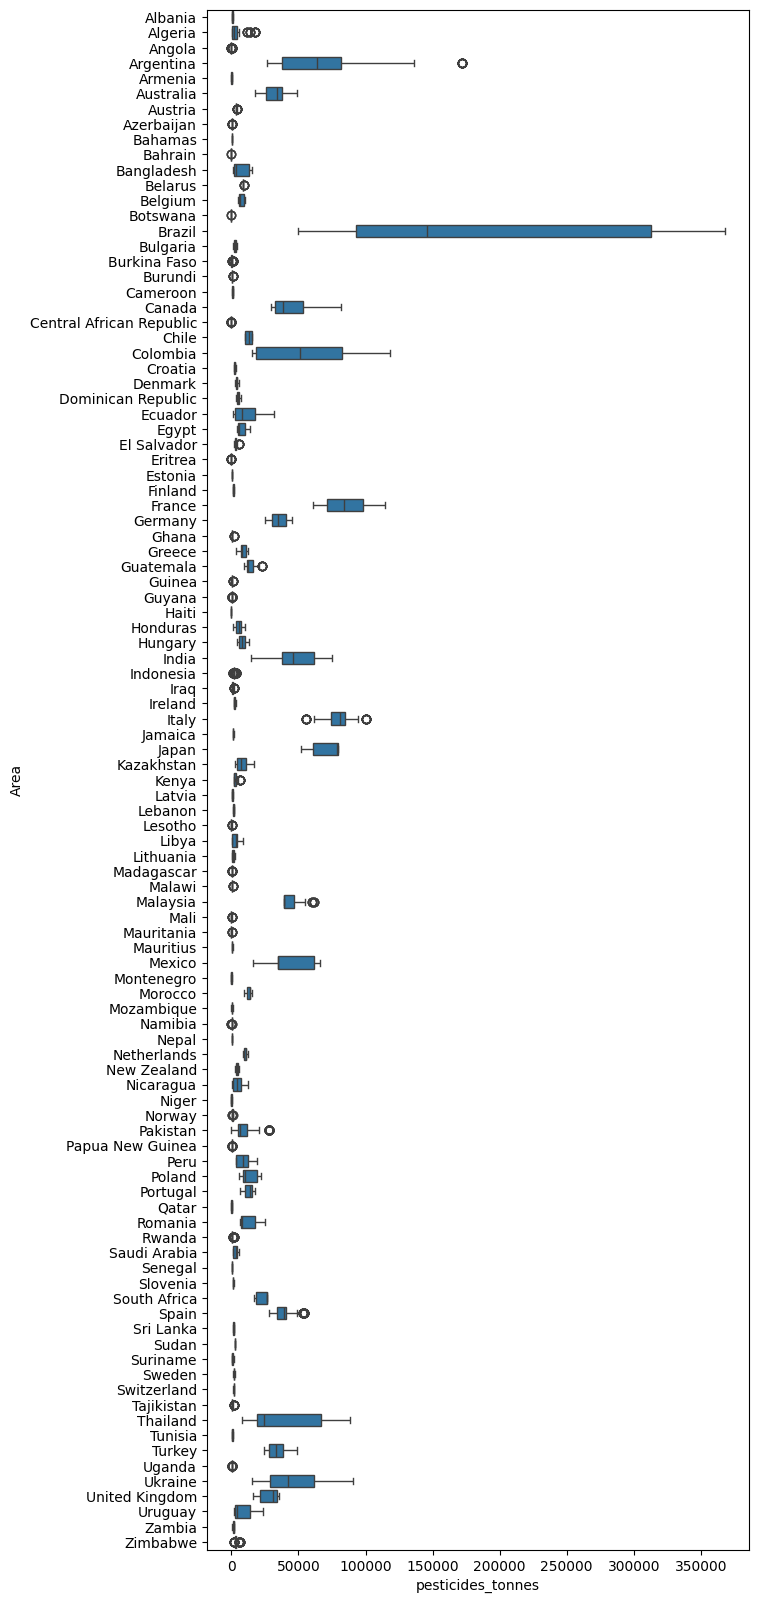

In [21]:
plt.figure(figsize=(7,20))
sns.boxplot(y='Area', x='pesticides_tonnes', data=df)
plt.show()

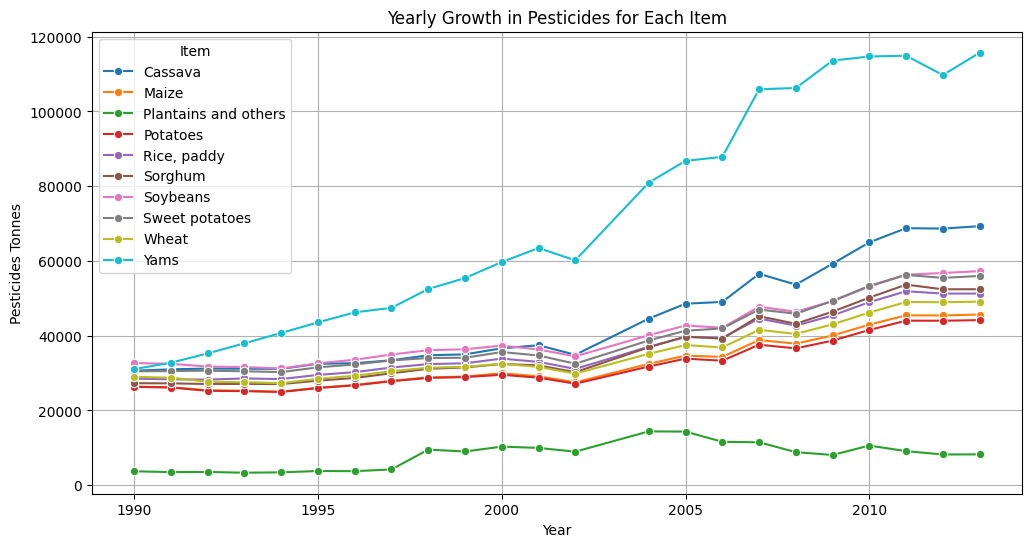

In [22]:
yearly_rainfall_growth = df.groupby(['Year', 'Item'])['pesticides_tonnes'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='pesticides_tonnes', hue='Item', data=yearly_rainfall_growth, marker='o')

plt.title('Yearly Growth in Pesticides for Each Item')
plt.ylabel('Pesticides Tonnes')
plt.xlabel('Year')
plt.grid(True)
plt.show()

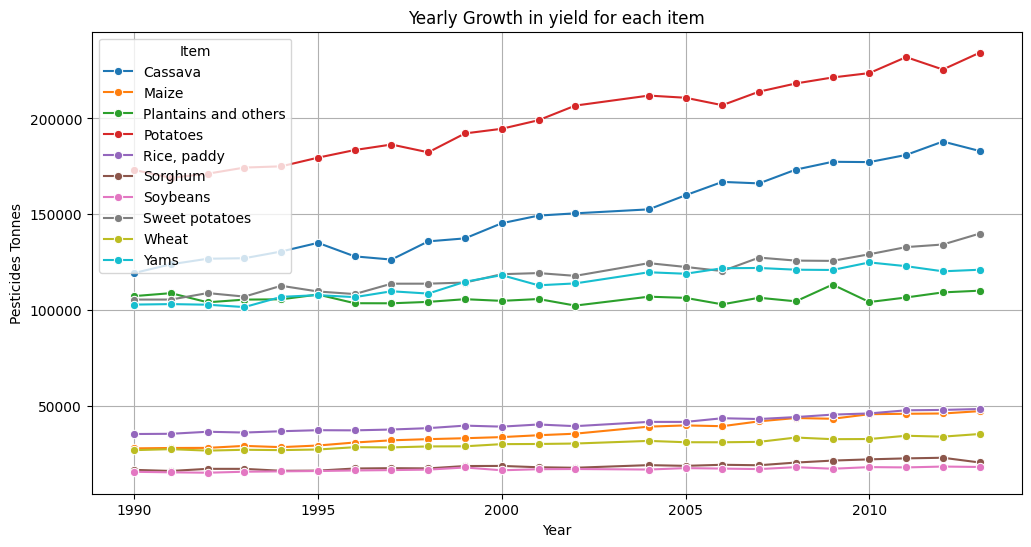

In [25]:
yearly_rainfall_growth = df.groupby(['Year', 'Item'])['hg/ha_yield'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='hg/ha_yield', hue='Item', data=yearly_rainfall_growth, marker='o')

plt.title('Yearly Growth in yield for each item')
plt.ylabel('Pesticides Tonnes')
plt.xlabel('Year')
plt.grid(True)
plt.show()

<Axes: >

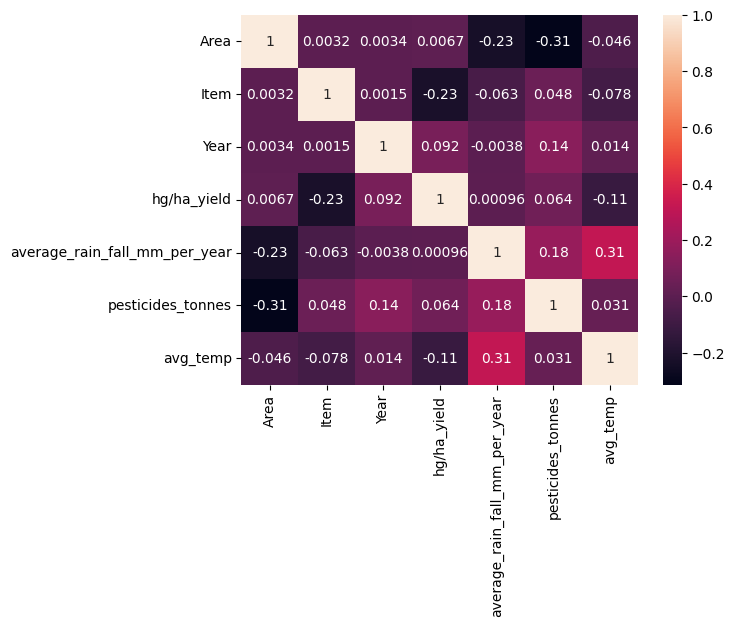

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le= LabelEncoder()

for col in df:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])
    
X = df.drop(labels=['hg/ha_yield'],axis=1)
Y = df['hg/ha_yield']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
sns.heatmap(df.corr(),annot=True)